In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('outputs/np_train_skills_no_commas.csv')

In [2]:
df.describe()

,Unnamed: 0,Target
count,19769.000000,13004.000000
mean,9884.000000,0.304445
std,5706.963072,0.460190
min,0.000000,0.000000
25%,4942.000000,0.000000
50%,9884.000000,0.000000
75%,14826.000000,1.000000
max,19768.000000,1.000000


In [3]:
df.head()

,Unnamed: 0,Phrase,Target
0,0,significant scope impact,0.0
1,1,monitor compliance,0.0
2,2,self-service reporting solutions,0.0
3,3,experience,0.0
4,4,strong attention detail commitment,1.0


In [4]:
df.isnull().sum()

Unnamed: 0       0
Phrase           1
Target        6765
dtype: int64

In [5]:
#drop french phrases and extra data
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
Phrase        0
Target        0
dtype: int64

In [6]:
len(df)

13004

In [7]:
print('Phrase Index with most characters is: ', df['Phrase'].str.len().idxmax())

Phrase Index with most characters is:  6593


In [8]:
df['Phrase'][6593]

'www.canada.ca/en/treasury-board-secretariat/services/professional-development/key-leadership-competency-profile/examples-effective-ineffective-behaviours.html create vision strategy'

In [9]:
df.sample(50, random_state = 5)

,Unnamed: 0,Phrase,Target
4397,4397,credit risk management modeling,1.0
18061,18061,adopt,0.0
3872,3872,contact member,0.0
11332,11332,various scope,0.0
18005,18005,handled,0.0
1321,1321,primary responsibilities,0.0
802,802,related technical field,1.0
4508,4508,considerable latitude exercise,0.0
9352,9352,baselining,1.0
8507,8507,high quality data,0.0


<AxesSubplot:xlabel='Target', ylabel='Counts'>

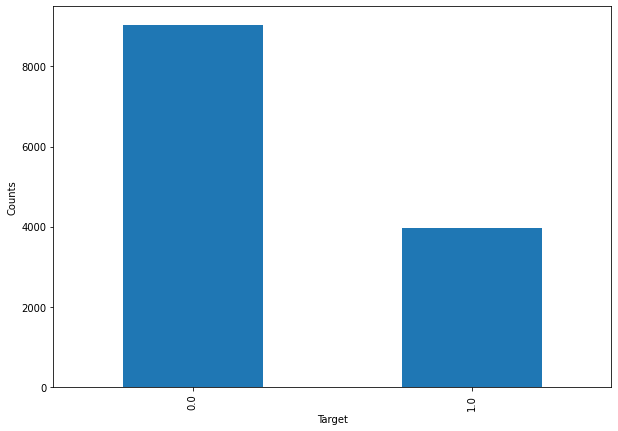

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel("Target")
plt.ylabel("Counts")

df["Target"].value_counts().plot(kind='bar')

In [11]:
from collections import Counter

#count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [12]:
text = df['Phrase']
counter = counter_word(text)

In [13]:
len(counter)

5772

In [14]:
counter

Counter({'significant': 19,
         'scope': 13,
         'impact': 53,
         'monitor': 9,
         'compliance': 16,
         'self-service': 5,
         'reporting': 29,
         'solutions': 151,
         'experience': 411,
         'strong': 127,
         'attention': 16,
         'detail': 19,
         'commitment': 14,
         'recombination': 1,
         'techniques': 54,
         'test': 19,
         'cases': 14,
         'aim': 3,
         'work': 276,
         'job': 76,
         'requirements': 80,
         'day': 21,
         'individuals': 25,
         'delivery': 42,
         'network': 22,
         '—': 7,
         'accenture': 6,
         'quantitative': 41,
         'analysis': 145,
         'tests': 10,
         'problems': 61,
         'everyone': 16,
         'expert': 21,
         'everything': 12,
         'long': 4,
         'term': 10,
         'equity': 18,
         'lightspeeders': 1,
         'implantable': 1,
         'medical': 16,
         'device': 

In [15]:
num_words = len(counter)

In [16]:
#max number of words in a sequence





#replace with length of longest string
max_length = 20

In [17]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( df['Phrase'], df['Target'], test_size=0.2, random_state=None)

In [18]:
def split_train_test(features, target, size):
    #size is the size of the training set
    train_size = int(features.shape[0]* size) #check me
    X_train = features[:train_size]
    y_train = target[:train_size]

    X_test = features[train_size:]
    y_test = target[train_size:]
    return X_train, y_train, X_test, y_test

In [19]:
train = df[['Phrase','Target']]
features = train['Phrase']
target = train['Target']
X_train, y_train, X_test, y_test = split_train_test(features, target, 0.8)

In [20]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

Init Plugin
Init Graph Optimizer
Init Kernel


In [21]:
word_index = tokenizer.word_index
word_index

{'data': 1,
 'experience': 2,
 'business': 3,
 'team': 4,
 'work': 5,
 'development': 6,
 'skills': 7,
 'analytics': 8,
 'science': 9,
 'solutions': 10,
 'management': 11,
 'technical': 12,
 '’': 13,
 'knowledge': 14,
 'analysis': 15,
 'product': 16,
 'ability': 17,
 'strong': 18,
 'environment': 19,
 'machine': 20,
 'time': 21,
 'software': 22,
 'new': 23,
 'engineering': 24,
 'tools': 25,
 'design': 26,
 'support': 27,
 'opportunity': 28,
 'ai': 29,
 'research': 30,
 'models': 31,
 'high': 32,
 'technology': 33,
 'company': 34,
 'learning': 35,
 'cloud': 36,
 'teams': 37,
 'technologies': 38,
 'projects': 39,
 'process': 40,
 'analytical': 41,
 'job': 42,
 'complex': 43,
 'customer': 44,
 'statistical': 45,
 'requirements': 46,
 'industry': 47,
 'products': 48,
 'systems': 49,
 'quality': 50,
 'role': 51,
 'services': 52,
 'performance': 53,
 'problems': 54,
 'information': 55,
 'people': 56,
 'degree': 57,
 'understanding': 58,
 'world': 59,
 'python': 60,
 'sql': 61,
 'insights': 6

In [22]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [23]:
train_sequences[0]

[290, 463, 72]

In [24]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [25]:
train_padded[0]

array([290, 463,  72,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [26]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [27]:
#check inverse
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [28]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [29]:
decode(train_sequences[0])

'significant scope impact'

In [30]:
print(df['Phrase'][0])

significant scope impact


In [31]:
print(train_padded.shape)
print(test_padded.shape)
#find out if the weight of the tokens affect the accuracy of the lstm

(10403, 20)
(2601, 20)


In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant

model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Embedding(num_words, 32, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])



Metal device set to: Apple M1


2021-08-17 15:43:52.109816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-17 15:43:52.110131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [33]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            184704    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 209,601
Trainable params: 209,601
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(
    train_padded, y_train, epochs=15, validation_split=0.2
)


2021-08-17 15:46:13.514207: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-17 15:46:13.517179: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2021-08-17 15:46:13.989376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-17 15:46:14.111848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-17 15:46:14.217816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.6587

2021-08-17 15:46:21.494578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-17 15:46:21.534089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 9s 30ms/step - loss: 0.6498 - accuracy: 0.6587 - val_loss: 0.5841 - val_accuracy: 0.7506
Epoch 2/15
261/261 [==============================] - 7s 28ms/step - loss: 0.6300 - accuracy: 0.6571 - val_loss: 0.5561 - val_accuracy: 0.7751
Epoch 3/15
261/261 [==============================] - 7s 28ms/step - loss: 0.6372 - accuracy: 0.6598 - val_loss: 0.5942 - val_accuracy: 0.7189
Epoch 4/15
261/261 [==============================] - 7s 28ms/step - loss: 0.6424 - accuracy: 0.6549 - val_loss: 0.5164 - val_accuracy: 0.7751
Epoch 5/15
261/261 [==============================] - 7s 28ms/step - loss: 0.6627 - accuracy: 0.6486 - val_loss: 0.5347 - val_accuracy: 0.7751
Epoch 6/15
261/261 [==============================] - 7s 28ms/step - loss: 0.6500 - accuracy: 0.6554 - val_loss: 0.5875 - val_accuracy: 0.7059
Epoch 7/15
261/261 [==============================] - 7s 28ms/step - loss: 0.6813 - accuracy: 0.6316 - val_loss: 0.6662 - val_accuracy: 0.7751
Epoch 8/15

In [36]:
def accuracy_loss_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Val'], loc='lower right')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Val'], loc='upper right')

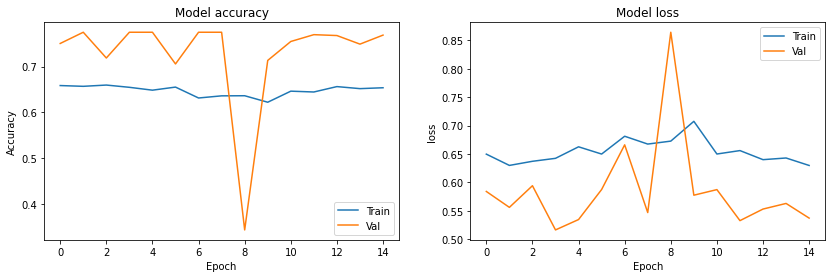

In [37]:
accuracy_loss_plot(history)

In [38]:
accr = model.evaluate(test_padded,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


82/82 [==============================] - 1s 10ms/step - loss: 0.5735 - accuracy: 0.7132
Test set
  Loss: 0.574
  Accuracy: 0.713


In [39]:
from tqdm import tqdm
from keras.layers import Dense,SpatialDropout1D
from nltk.tokenize import word_tokenize

"""Creates corpus from feature column, which is a pandas series"""
def create_corpus(df):
    corpus=[]
    for phrase in tqdm(df['Phrase']):
        words=[word.lower() for word in word_tokenize(phrase) if(word.isalpha()==1)]
        corpus.append(words)
    return corpus

In [41]:
"""Creates an embedding dictionary using GloVe"""
embedding_dict={}
with open('GloVe/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [68]:
"""Create padded sequences of equal lenght as input to LSTM"""
def create_padded_inputs(corpus):
    MAX_LEN=20
    tokenizer_obj=Tokenizer()
    tokenizer_obj.fit_on_texts(corpus)
    sequences=tokenizer_obj.texts_to_sequences(corpus)

    phrase_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')
    return phrase_pad

In [ ]:
corpus=create_corpus(df)
phrase_pad = create_padded_inputs(corpus)

In [43]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 4974


In [44]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|███████████████████████████████████| 4974/4974 [00:00<00:00, 787500.68it/s]


In [45]:
model_embed = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

model_embed.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [46]:
model_embed.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           497500    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 539,805
Trainable params: 42,305
Non-trainable params: 497,500
_________________________________________________________________


In [47]:
X_train, y_train, X_test, y_test = split_train_test(phrase_pad, df['Target'], 0.8)

In [48]:
history=model_embed.fit(X_train,y_train,batch_size=4,epochs=15,validation_split=0.2,verbose=2)

Epoch 1/15


2021-08-17 15:48:12.217044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-17 16:13:30.917629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2081/2081 - 1542s - loss: 0.6745 - accuracy: 0.6673 - val_loss: 0.5978 - val_accuracy: 0.7751
Epoch 2/15
2081/2081 - 1537s - loss: 0.6047 - accuracy: 0.6778 - val_loss: 0.4797 - val_accuracy: 0.7987
Epoch 3/15
2081/2081 - 1544s - loss: 0.5415 - accuracy: 0.7356 - val_loss: 0.4606 - val_accuracy: 0.7799
Epoch 4/15
2081/2081 - 1533s - loss: 0.5208 - accuracy: 0.7490 - val_loss: 0.4567 - val_accuracy: 0.7631
Epoch 5/15
2081/2081 - 1526s - loss: 0.5146 - accuracy: 0.7483 - val_loss: 0.4603 - val_accuracy: 0.7593
Epoch 6/15
2081/2081 - 1527s - loss: 0.5096 - accuracy: 0.7540 - val_loss: 0.4514 - val_accuracy: 0.7713
Epoch 7/15
2081/2081 - 1526s - loss: 0.5032 - accuracy: 0.7593 - val_loss: 0.4563 - val_accuracy: 0.7693
Epoch 8/15
2081/2081 - 1529s - loss: 0.5025 - accuracy: 0.7555 - val_loss: 0.4514 - val_accuracy: 0.7775
Epoch 9/15
2081/2081 - 1529s - loss: 0.4958 - accuracy: 0.7605 - val_loss: 0.4479 - val_accuracy: 0.7751
Epoch 10/15
2081/2081 - 1539s - loss: 0.4949 - accuracy: 0.7580 - 

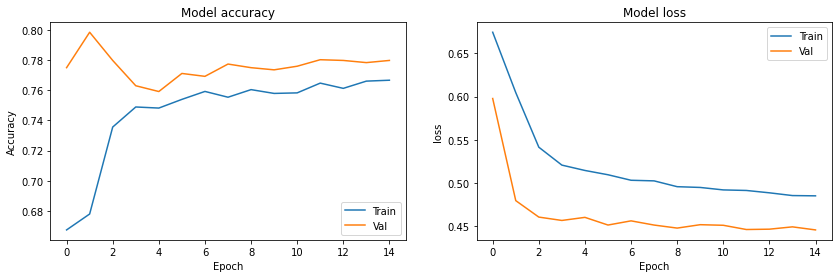

In [49]:
accuracy_loss_plot(history)

In [50]:
accr = model_embed.evaluate(X_test,y_test)
print('Test set\n  Loss for model embed: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

82/82 [==============================] - 4s 48ms/step - loss: 0.4938 - accuracy: 0.7393
Test set
  Loss for model embed: 0.494
  Accuracy: 0.739


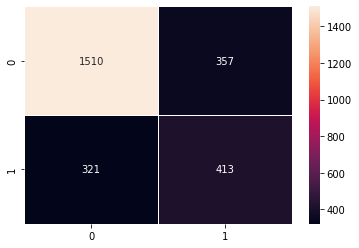

In [76]:
#evaluate
import seaborn as sns
from sklearn.metrics import confusion_matrix

#convert probabilistic output to binary
y_pred = (model_embed.predict(X_test) > 0.5).astype("int32")
#confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);


In [77]:
#precision, recall, AUC, ROC Curve
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy = accuracy_score(y_test, y_pred)
metric = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print('Set Accuracy: \t', round(accuracy * 100, 2))
print('Set Precision: \t', round(metric[0], 2))
print('Set Recall: \t', round(metric[1], 2))
print('Set F score: \t', round(metric[2], 2))

Set Accuracy: 	 73.93
Set Precision: 	 0.68
Set Recall: 	 0.69
Set F score: 	 0.68


In [58]:
model_embed.save('models/lstm_skill_extractor.h5')

In [59]:
saved_model = tf.keras.models.load_model('models/lstm_skill_extractor.h5')

In [60]:
#check that model is saved properly
accr = saved_model.evaluate(X_test,y_test)
print('Test set\n  Loss for model embed: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

 2/82 [..............................] - ETA: 4s - loss: 0.4681 - accuracy: 0.7188 

2021-08-17 22:25:28.650426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 4s 44ms/step - loss: 0.4938 - accuracy: 0.7393
Test set
  Loss for model embed: 0.494
  Accuracy: 0.739
